In [82]:
import sys 
sys.path.append(rf"/nfs/home/genovese/thesis-wildfire-genovese/src")
from importlib import reload
import utils
reload(utils)
from utils import *

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sys.path.append(rf"/nfs/home/genovese/thesis-wildfire-genovese/src/OnFireForest/")
import processer
reload(processer)
from processer import *

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def pca_with_results(df, plot=True):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Step 2: Apply PCA
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)

    # Step 3: Create a DataFrame of PCA results
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{c}' for c in range(1, df.shape[1]+1)], index=df.index)

    # Step 4: Explained variance
    explained_variance = pca.explained_variance_ratio_
    pcs = np.arange(1, len(explained_variance) + 1)

    # Step 5: Plot
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(10,8))
        ax[0].plot(pcs[:81], explained_variance[:81], marker='o', linestyle='-')
        ax[0].set_title('Explained Variance by Principal Component')
        ax[0].set_xlabel('Principal Component')
        ax[0].set_ylabel('Explained Variance Ratio')
        ax[0].set_xticks(range(1, 81, 4), range(1, 81, 4), rotation='vertical', fontsize=8)
        ax[0].grid(True)

        ax[1].plot(pcs[:81], np.cumsum(explained_variance[:81]), marker='o', linestyle='-')
        ax[1].set_title('Cumulative Explained Variance by Principal Component')
        ax[1].set_xlabel('Principal Component')
        ax[1].set_ylabel('Explained Variance Ratio')
        ax[1].set_xticks(range(1, 81, 4), range(1, 81, 4), rotation='vertical', fontsize=8)
        ax[0].grid(True)
        
        plt.subplots_adjust(wspace=0.5)
        plt.show()

    return pca, pca_df

In [185]:
data = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/database/model_input/not_imputed_dataset_rekriged.csv').drop(columns=['Unnamed: 0', 'fire_id'])
df = preprocess(data.drop(columns=['target', 'label']))[0]

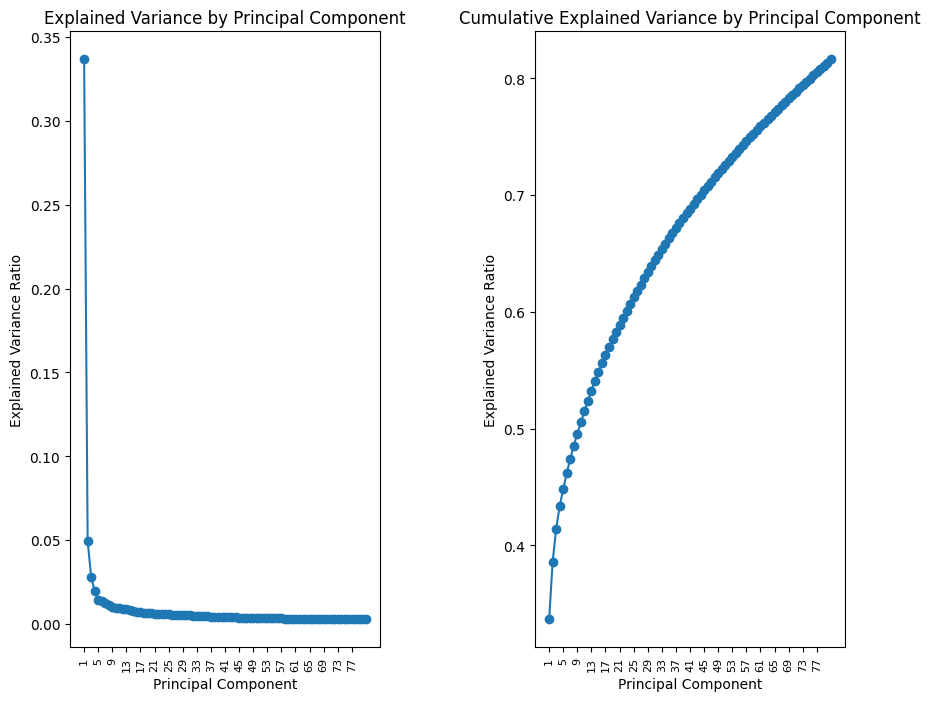

In [186]:
pca, pca_df = pca_with_results(df)

In [187]:
import pickle 
with open('/nfs/home/genovese/thesis-wildfire-genovese/src/trained_models/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [189]:
pca_df.to_csv('/nfs/home/genovese/thesis-wildfire-genovese/database/model_input/pca_tranformed_without_target.csv', index=False)

---